In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv(r"C:\Users\lfbou\Downloads\weatherAUS.csv", sep=',')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#on convertie en date la colonne date : 
df['Date'] = pd.to_datetime(df['Date'])

# .On affiche le pourcentage de valeur manquante 

In [5]:
df.isna().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

In [6]:
#Pour indentifier qu'elles sont les valeurs à garder nous allons observer la variance et covariance sur la donnée cible :  rain tomorow 

In [6]:
#pour cela nous allons devoir transformer les odnnées Ys et No en valeur binaire 
df["RainTomorrow_bin"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})

In [7]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTomorrow_bin
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No,0.0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No,0.0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No,0.0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes,1.0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No,0.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

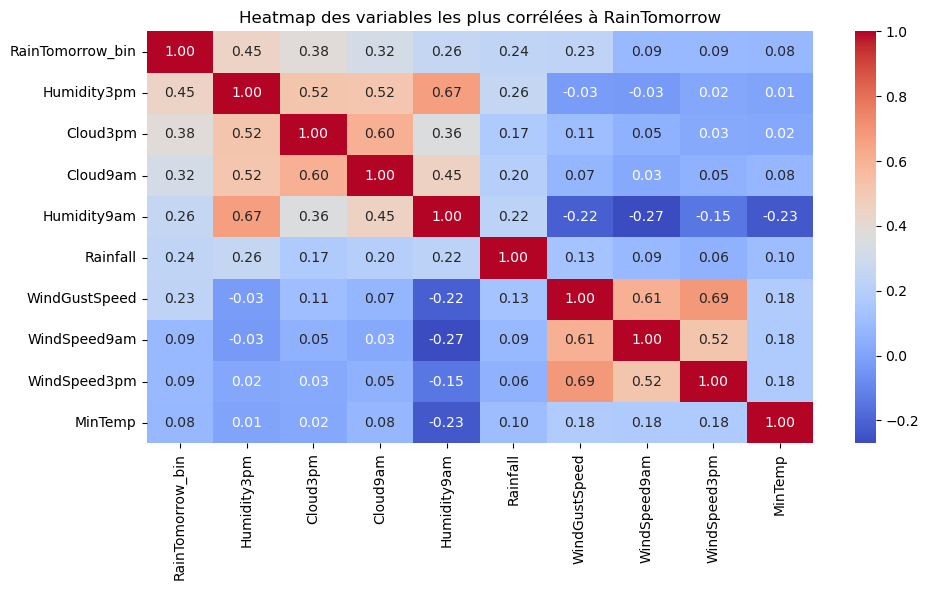

In [9]:
corr = df.corr(numeric_only=True)["RainTomorrow_bin"].dropna().sort_values(ascending=False)
top_vars = corr.head(10).index
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_vars].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap des variables les plus corrélées à RainTomorrow")
plt.tight_layout()
plt.show()


In [11]:
#Cette figure met en évidence l’intérêt de suivre l’humidité de l’après-midi et la nébulosité comme indicateurs de pluie le lendemain : Humidity3pm (+0.45) et Cloud3pm, Cloud9am.
#C'est logique + le ciel est couvert et + l'ai est saturé d'humidité plus les chances de pleuvoirs sont importantes
# Elles sembelent les plus cohérentes  y compris si elles présentent des valeurs manquantes : il est justifié de les imputer plutôt que de les supprimer.

In [11]:
#On intégre une  ou une valeur médiane pourrait être instancé  

In [10]:
# Liste des colonnes numériques à traiter
colonnes_numeriques = ['Humidity3pm', 'Cloud3pm', 'Rainfall', 'Sunshine']

# Imputation par la médiane
for col in colonnes_numeriques:
    mediane = df[col].median()
    df[col].fillna(mediane, inplace=True)

# Vérification rapide
print(df[colonnes_numeriques + ['RainTomorrow']].head())

   Humidity3pm  Cloud3pm  Rainfall  Sunshine RainTomorrow
0         22.0       5.0       0.6       8.4           No
1         25.0       5.0       0.0       8.4           No
2         30.0       2.0       0.0       8.4           No
3         16.0       5.0       0.0       8.4           No
4         33.0       8.0       1.0       8.4           No


C:\Users\lfbou\AppData\Local\Temp\ipykernel_7448\4129133509.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediane, inplace=True)


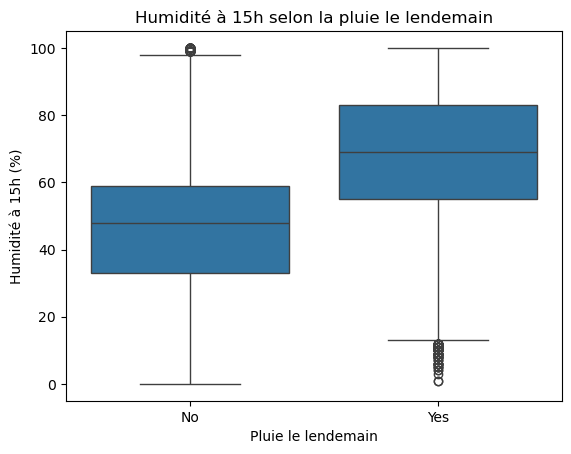

In [15]:
#on va lancer une visualisation en boite à moustache de la variable Humidity3pm selon RainTomorrow pour émettre comme hypôthése que celle ci pourrait être prédictive

sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title("Humidité à 15h selon la pluie le lendemain")
plt.xlabel("Pluie le lendemain")
plt.ylabel("Humidité à 15h (%)")
plt.show()
#On voit que c'est une variable qui pourrait aider à prédire si il pleuvra demain 

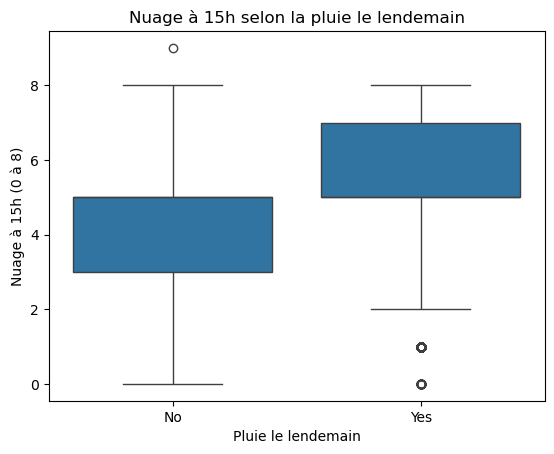

In [20]:
#nous allons observer la variable Cloud3pm selon RainTomorrow dans le même but que la précedante 
sns.boxplot(x='RainTomorrow', y='Cloud3pm', data=df)
plt.title("Nuage à 15h selon la pluie le lendemain")
plt.xlabel("Pluie le lendemain")
plt.ylabel("Nuage à 15h (0 à 8)")
plt.show()
#On voit que c'est une variable qui pourrait aider à prédire si il pleuvra demain 

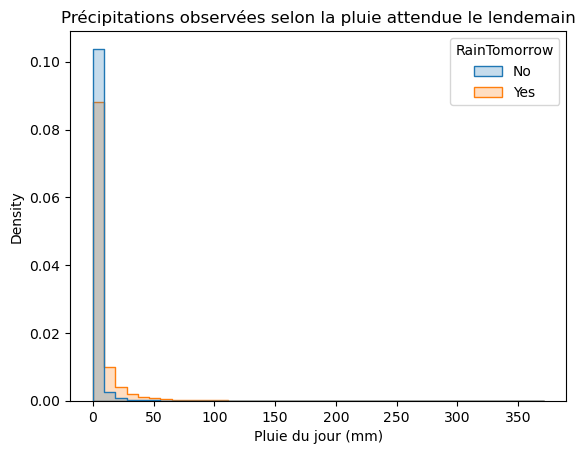

In [23]:
#on pourrait voir la recurrence de 2 jours de pluie consécutif via un histogramme 
sns.histplot(data=df[df['Rainfall'].notna()], x='Rainfall', hue='RainTomorrow', bins=40, element='step', stat='density', common_norm=False)
plt.title("Précipitations observées selon la pluie attendue le lendemain")
plt.xlabel("Pluie du jour (mm)")
plt.show()
#on observe que quand il pleut la veille il y a plus de chance de pleuvoir le lendemain 

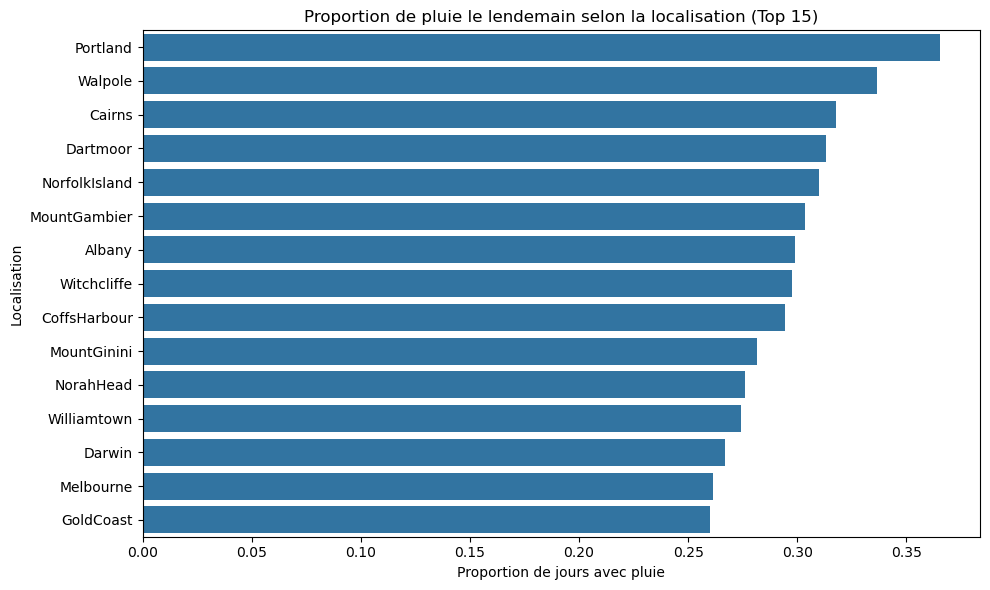

In [26]:
#Nous allons regarder ou est ce qu'il y a le plus de chance de pleuvoir en fonction de la localisation mais aupravant nous devons passer la colonne pluie aujourd'hui en binaire pour appliquer la moyenne 

df['RainTomorrow_bin'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Calcul de la proportion de jours avec pluie pour chaque localisation
rain_by_location = df.groupby('Location')['RainTomorrow_bin'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=rain_by_location.values, y=rain_by_location.index)
plt.title("Proportion de pluie le lendemain selon la localisation (Top 15)")
plt.xlabel("Proportion de jours avec pluie")
plt.ylabel("Localisation")
plt.tight_layout()
plt.show()